(updates per centre) × (population per centre)

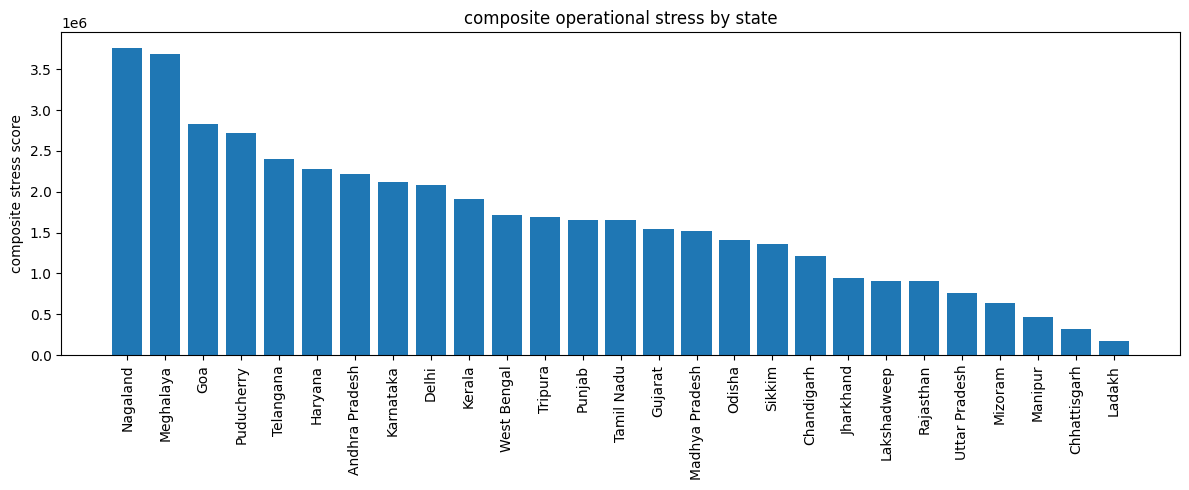

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")
updates=pd.concat([demo,bio]).groupby("state").size().reset_index(name="updates")

centres=pd.read_csv("../sql/data/Aadhar.csv")
centres=centres.rename(columns={"State":"state","No. of centres":"centres"})
centres["centres"]=pd.to_numeric(centres["centres"],errors="coerce")

population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")
population=population.rename(columns={"State/UT":"state","Population 2025":"population"})
population["population"]=population["population"].astype(str).str.replace(",","").astype(int)

df=updates.merge(centres,on="state").merge(population,on="state")

df["updates_per_centre"]=df["updates"]/df["centres"]
df["population_per_centre"]=df["population"]/df["centres"]
df["composite_stress_score"]=df["updates_per_centre"]*df["population_per_centre"]

df=df.sort_values("composite_stress_score",ascending=False)

plt.figure(figsize=(12,5))
plt.bar(df["state"],df["composite_stress_score"])
plt.xticks(rotation=90)
plt.ylabel("composite stress score")
plt.title("composite operational stress by state")
plt.tight_layout()
plt.show()
